**MICROSOFT MOVIE STUDIO**

**Author: MALON CHIRCHIR**

**Business Problem**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

**DATA**

In the folder zippedData are movie datasets from:

https://www.boxofficemojo.com/.
https://www.imdb.com/.
https://www.rottentomatoes.com/.
https://www.themoviedb.org/.
https://www.the-numbers.com/.
It is up to you to decide what data from this to use and how to use it. If you want to make this more challenging, you can scrape websites or make API calls to get additional data. If you are feeling overwhelmed or behind (e.g. struggled with the Phase 1 Code Challenge), we recommend you use only the following data files:

imdb.title.basics
imdb.title.ratings
bom.movie_gross

**DATA IMPORTATION & CLEANING**

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importing movie gross data
movie_gross=pd.read_csv('/content/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#importing title basics data
basics=pd.read_csv('/content/title.basics.csv')
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# importing title ratings data
ratings=pd.read_csv("/content/title.ratings.csv")
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
#checking movie_gross shape
movie_gross.shape

(3387, 5)

In [7]:
#checking basics shape
basics.shape

(146144, 6)

In [9]:
#checking ratings shape
ratings.shape

(73856, 3)

**DATA CLEANING**

In [10]:
# merging ratings and basics dataframes based on 'tconst' column
df0=ratings.merge(basics, on = 'tconst', how = 'inner')
df0.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [11]:
# checking the shape of df0
df0.shape

(73856, 8)

In [12]:
#concatenating the df0 and movie datasets
df = pd.concat([movie_gross,df0])
df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#checking for missing values
df.isna().sum()

title              73856
studio             73861
domestic_gross     73884
foreign_gross      75206
year               73856
tconst              3387
averagerating       3387
numvotes            3387
primary_title       3387
original_title      3387
start_year          3387
runtime_minutes    11007
genres              4191
dtype: int64

Dropping and filling missing values

In [14]:
df.domestic_gross.fillna(df.domestic_gross.mean(),inplace=True)

In [16]:
df.foreign_gross.fillna(df.foreign_gross.mode(),inplace=True)

In [17]:
df.averagerating.fillna(df.averagerating.mean(),inplace=True)

In [18]:
df.numvotes.fillna(df.numvotes.mean(),inplace=True)

In [19]:
df.runtime_minutes.fillna(df.runtime_minutes.mean(),inplace=True)

Filling missing values as unknowns

In [20]:
df['genres'].fillna('Unknown_genres', inplace=True)

In [21]:
df['studio'].dropna(inplace=True)

In [22]:
df['year'].dropna(inplace=True)

In [23]:
df['start_year'].dropna(inplace=True)

In [24]:
df.drop(['original_title'], axis=1).head(3)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010.0,NaN,6.332729,3523.662167,NaN,NaN,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,6.332729,3523.662167,NaN,NaN,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,NaN,6.332729,3523.662167,NaN,NaN,94.65404,Unknown_genres


In [28]:
# finding the mode of the column 'year'
mode_1=df['year'].mode()[0]
mode_1

2015.0

In [29]:
# replacing null values with mode_1 value
df['year'].fillna(mode_1, inplace=True)

In [30]:
# finding the mode of the column 'start_year'
mode_value=df['start_year'].mode()[0]
mode_value

2016.0

In [31]:
# replacing null values with mode_value
df['start_year'].fillna(mode_value, inplace=True)

In [32]:
#changing start_year and year columns to datetime
df['year'] = pd.to_datetime(df['year'])
df['start_year'] = pd.to_datetime(df['start_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77243 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            3387 non-null   object        
 1   studio           3382 non-null   object        
 2   domestic_gross   77243 non-null  float64       
 3   foreign_gross    2038 non-null   object        
 4   year             77243 non-null  datetime64[ns]
 5   tconst           73856 non-null  object        
 6   averagerating    77243 non-null  float64       
 7   numvotes         77243 non-null  float64       
 8   primary_title    73856 non-null  object        
 9   original_title   73856 non-null  object        
 10  start_year       77243 non-null  datetime64[ns]
 11  runtime_minutes  77243 non-null  float64       
 12  genres           77243 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 8.3+ MB


In [33]:
# checking the info on df DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77243 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            3387 non-null   object        
 1   studio           3382 non-null   object        
 2   domestic_gross   77243 non-null  float64       
 3   foreign_gross    2038 non-null   object        
 4   year             77243 non-null  datetime64[ns]
 5   tconst           73856 non-null  object        
 6   averagerating    77243 non-null  float64       
 7   numvotes         77243 non-null  float64       
 8   primary_title    73856 non-null  object        
 9   original_title   73856 non-null  object        
 10  start_year       77243 non-null  datetime64[ns]
 11  runtime_minutes  77243 non-null  float64       
 12  genres           77243 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 8.3+ MB


In [35]:
# printing head(top 5) info
df.head()


,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
3,Inception,WB,292600000.0,535700000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
4,Shrek Forever After,P/DW,238700000.0,513900000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres


In [36]:
# checking the number of null values in df
df.isna().sum()

title              73856
studio             73861
domestic_gross         0
foreign_gross      75205
year                   0
tconst              3387
averagerating          0
numvotes               0
primary_title       3387
original_title      3387
start_year             0
runtime_minutes        0
genres                 0
dtype: int64

**EXPLORATORY DATA ANALYSIS & VISUALIZATIONS**

<Axes: title={'center': 'Boxplot to detect outliers for averagerating'}, xlabel='averagerating'>

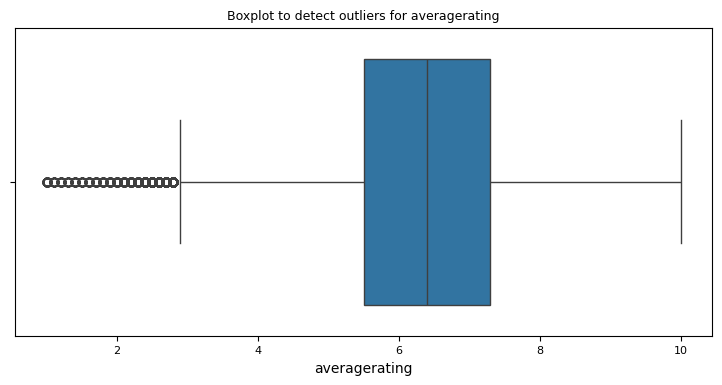

In [39]:
#boxplot to visualize distribution of outliers in avearagerating
plt.figure(figsize=(9,4))
plt.title('Boxplot to detect outliers for averagerating', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['averagerating'])

In [41]:
# describe numvotes dataset
df.describe()['numvotes']

count    7.724300e+04
mean     3.523662e+03
std      2.962239e+04
min      5.000000e+00
25%      1.500000e+01
50%      5.600000e+01
75%      3.810000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [43]:
# describe domestic_gross dataset
df.describe()['domestic_gross']

count    7.724300e+04
mean     2.874585e+07
std      1.396609e+07
min      1.000000e+02
25%      2.874585e+07
50%      2.874585e+07
75%      2.874585e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [45]:
# describing runtime_minutes dataset
df.describe()['runtime_minutes']

count    77243.000000
mean        94.654040
std        193.142308
min          3.000000
25%         83.000000
50%         94.654040
75%        100.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [46]:
# calling the df dataset
df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
3,Inception,WB,292600000.0,535700000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres
4,Shrek Forever After,P/DW,238700000.0,513900000,1970-01-01 00:00:00.000002010,NaN,6.332729,3523.662167,NaN,NaN,1970-01-01 00:00:00.000002016,94.65404,Unknown_genres


In [47]:
# finding the top 10 genres
top_10_genres = pd.DataFrame(df['genres'].value_counts().head(10))
top_10_genres

,genres
Drama,11612
Documentary,10313
Comedy,5613
Unknown_genres,4191
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208


<Figure size 100x100 with 0 Axes>

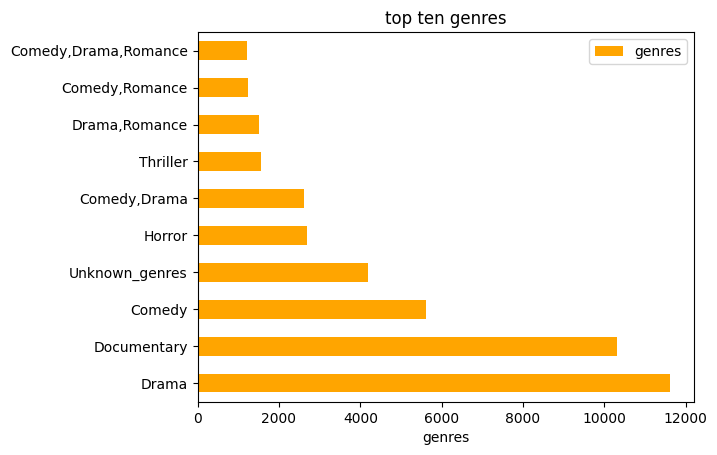

In [50]:
#histogram to show distribution of top_10_genres
plt.figure(figsize=(1,1))
top_10_genres.plot(kind='barh', color='orange')
plt.title('top ten genres')
plt.xlabel("genres")
plt.show()

In [51]:
# finding the top 10 studios
top_10_studios=pd.DataFrame(df['studio'].value_counts().head(10))
top_10_studios

,studio
IFC,166
Uni.,147
WB,140
Fox,136
Magn.,136
SPC,123
Sony,110
BV,106
LGF,103
Par.,101


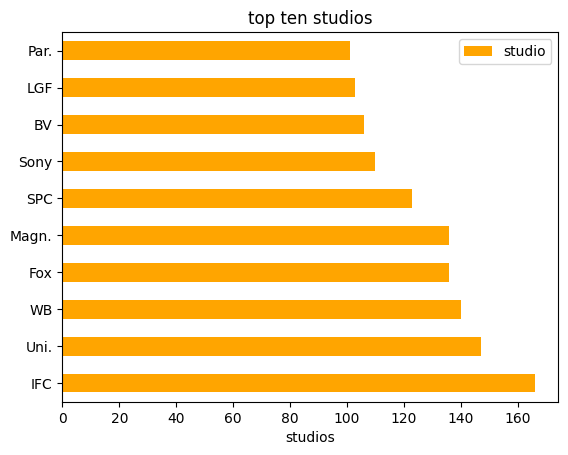

In [52]:
#bar chart to represent  top_ten_studios
top_10_studios.plot(kind='barh', color='orange')
plt.title('top ten studios')
plt.xlabel("studios")
plt.show()

In [66]:
# reading budgets dataset
budgets=pd.read_csv('/content/tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [74]:
# checking the info in budgets dataset
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [109]:
# converting budgets dataset to string to be able to calculate profits
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(str)
budgets['production_budget'] = budgets['production_budget'].astype(str)

In [110]:
# removing the Dollar Sign to make the columns floats
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
# calculating the profits
budgets['Profit' ] = budgets['worldwide_gross'] - budgets['production_budget']
budgets.head()

<ipython-input-110-0087e75673fc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['production_budget'] = budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-110-0087e75673fc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Profit
0,1,18-Dec-09,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,7-Jun-19,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,1-May-15,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [111]:
# calling the movie_gross dataset
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [112]:
# calling the df0 dataset
df0

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [113]:
# changing the primary_title to title name in df0
df0.rename(columns = {'primary_title':'title'}, inplace = True)

In [114]:
# renaming movies to title in budgets dataset
budgets.rename(columns = {'movie':'title'}, inplace = True)

In [115]:
# calling the new budgets dataset with the changed title
budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Profit
0,1,18-Dec-09,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,7-Jun-19,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,1-May-15,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03
5778,79,2-Apr-99,Following,6000.0,48482.0,2.404950e+05,2.344950e+05
5779,80,13-Jul-05,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03
5780,81,29-Sep-15,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03


In [116]:
# merging df0 and budgets dataset based on the column we have renamed for the two datasets above, 'title'
df1=pd.merge(df0,budgets, on='title')

In [117]:
# calling head of df1, the result of merging above
df1.head()

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,10-Jan-14,70000000.0,18848538.0,58953319.0,-11046681.0
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,21-Mar-08,850000.0,442638.0,442638.0,-407362.0
2,tt3096900,6.5,13,The Hammer,The Hammer,2015,75.0,"Action,Adventure,Documentary",50,21-Mar-08,850000.0,442638.0,442638.0,-407362.0
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,27-Sep-13,8500000.0,21569509.0,22885836.0,14385836.0
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,23-Sep-11,50000000.0,75605492.0,111300835.0,61300835.0


In [123]:
# understanding df1 info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   averagerating      2875 non-null   float64
 2   numvotes           2875 non-null   int64  
 3   title              2875 non-null   object 
 4   original_title     2875 non-null   object 
 5   start_year         2875 non-null   int64  
 6   runtime_minutes    2757 non-null   float64
 7   genres             2867 non-null   object 
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  production_budget  2875 non-null   float64
 11  domestic_gross     2875 non-null   float64
 12  worldwide_gross    2875 non-null   float64
 13  Profit             2875 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 401.5+ KB


In [121]:
# calling the profits column
df1['Profit']

0      -11046681.0
1        -407362.0
2        -407362.0
3       14385836.0
4       61300835.0
           ...    
2870    -2693352.0
2871    81040000.0
2872    -9758281.0
2873    -1401194.0
2874      255538.0
Name: Profit, Length: 2875, dtype: float64

In [118]:
# and then now finding profits by genre from the new df1 dataset
profits_by_genre = pd.DataFrame(df1.groupby('genres')['Profit'].sum())
profits_values=profits_by_genre.sort_values( by ='Profit',ascending=False).head(10)
profits_values

,Profit
genres,
"Action,Adventure,Sci-Fi",2.543415e+10
"Adventure,Animation,Comedy",2.034716e+10
"Action,Adventure,Fantasy",8.711758e+09
Drama,7.678410e+09
"Action,Adventure,Comedy",7.068300e+09
"Action,Adventure,Animation",5.478379e+09
Horror,5.010271e+09
"Adventure,Family,Fantasy",3.838999e+09
Documentary,3.815704e+09


<Axes: ylabel='genres'>

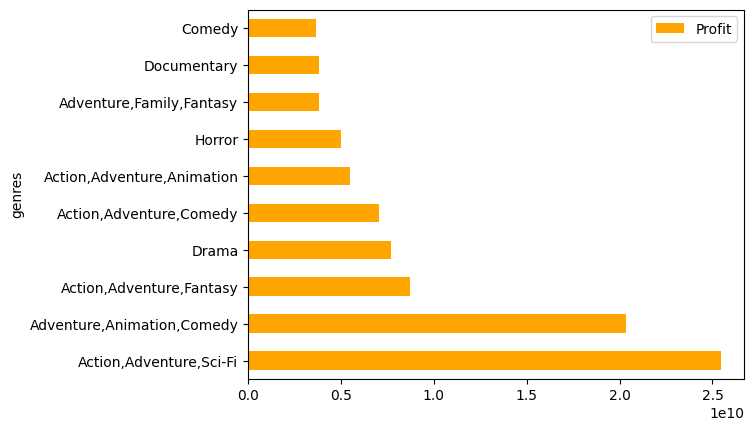

In [119]:
# horizontal bar plot to show profits in relation to genres
profits_values.plot(kind='barh', color='orange')

Text(0.5, 1.0, 'Total Domestic Gross per Month')

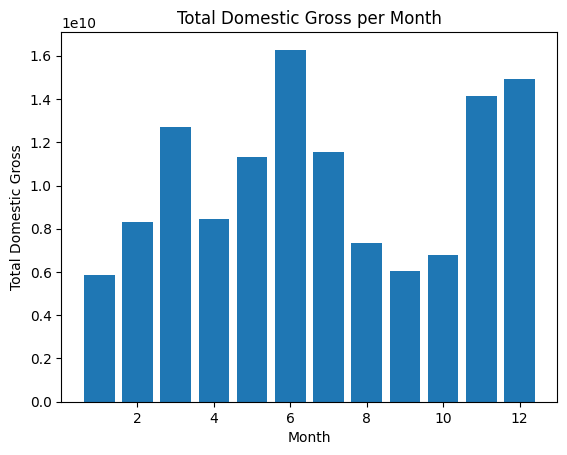

In [161]:
# plot a bar chart of Total Domestic Gross per Month
# Convert release date to datetime format
df1['release_date'] = pd.to_datetime(df1['release_date'])

# Extract month from release date
df1['Release Month'] = df1['release_date'].dt.month

# Group by month and calculate total domestic gross
monthly_domestic_gross = df1.groupby('Release Month')['domestic_gross'].sum()

# Plot bar chart
plt.bar(monthly_domestic_gross.index, monthly_domestic_gross.values)

# Customize plot
plt.xlabel('Month')
plt.ylabel('Total Domestic Gross')
plt.title('Total Domestic Gross per Month')

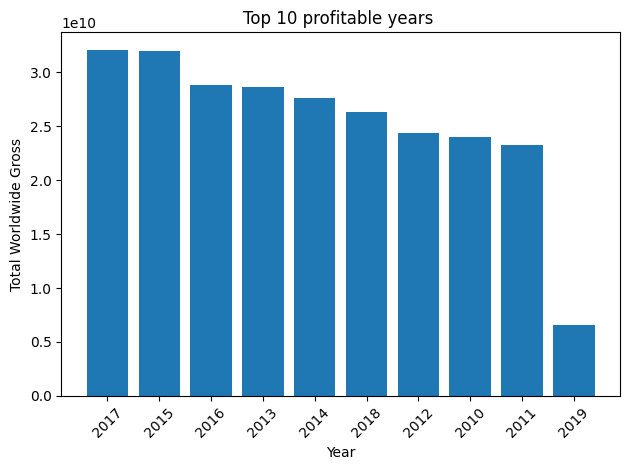

In [128]:
# plot a bar chart of Top 10 profitable years in terms of Worlwide Gross
# Convert release date to datetime format and extract release year
df1['Release Year'] = pd.to_datetime(df1['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df1.groupby('Release Year')['worldwide_gross'].sum()


# Sort years based on total worldwide gross and select top 10 years
top_10_years = yearly_worldwide_gross.sort_values(ascending=False).head(10)

# Plot bar chart
plt.bar(top_10_years.index.astype(str), top_10_years.values)

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross')
plt.title('Top 10 profitable years ')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

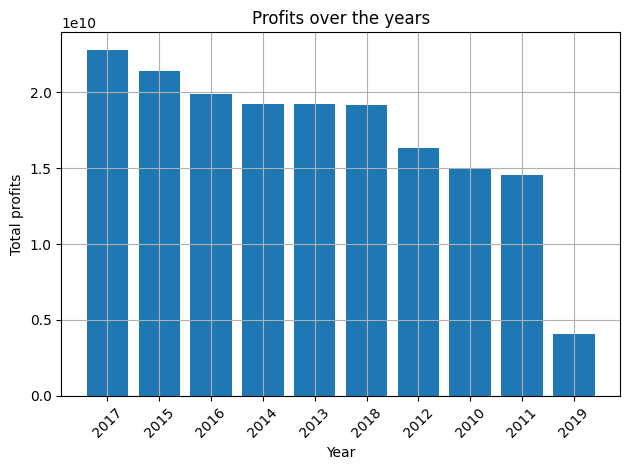

In [131]:
# plot a bar chart of trends of profits over the years
# Convert release date to datetime format and extract release year
df1['Release Year'] = pd.to_datetime(df1['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df1.groupby('Release Year')['Profit'].sum()
#yearly_worldwide_gross.sort_values(yearly_worldwide_gross, ascending=False)


# Sort years based on total worldwide gross and select top 10 years
top_10_years = yearly_worldwide_gross.sort_values(ascending=False).head(10)

# Plot bar chart
plt.bar(top_10_years.index.astype(str), top_10_years.values)

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total profits')
plt.title('Profits over the years')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

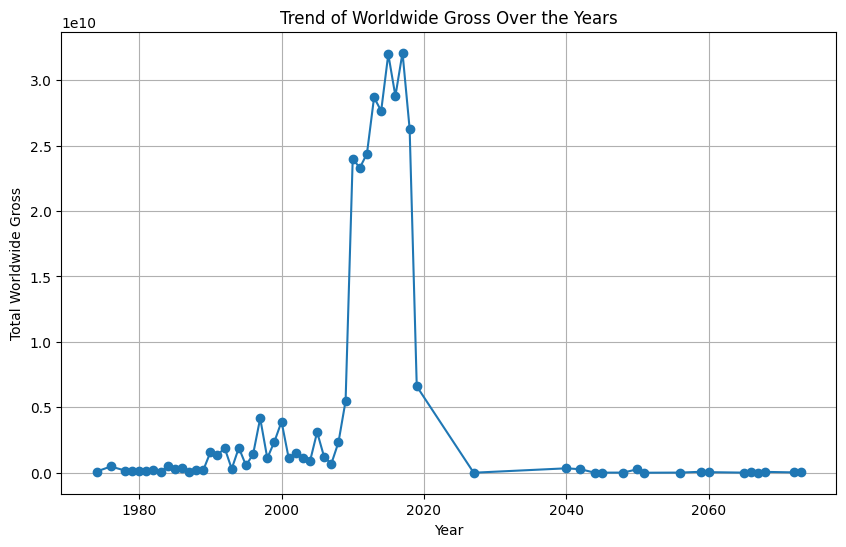

In [147]:
# plot a line plot of Trend of Worldwide Gross Over the Years
# Convert release date to datetime format
df1['release_date'] = pd.to_datetime(df1['release_date'])

# Extract year from release date
df1['Release Year'] = df1['release_date'].dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df1.groupby('Release Year')['worldwide_gross'].sum()

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_worldwide_gross.index, yearly_worldwide_gross.values, marker='o', linestyle='-')
plt.title('Trend of Worldwide Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross')
plt.grid(True)
plt.show()

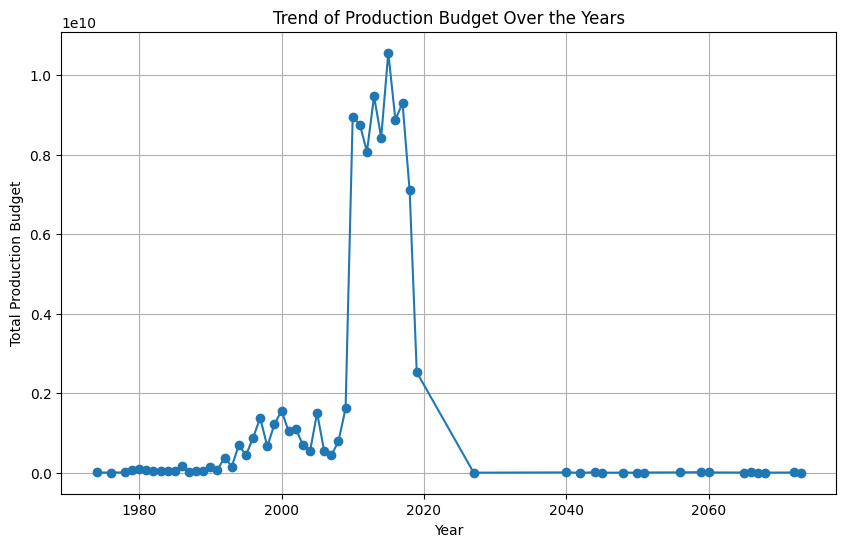

In [155]:
# plot a line plot of Trend of Production Budget Over the Years
# Convert release date to datetime format
df1['release_date'] = pd.to_datetime(df1['release_date'])

# Extract year from release date
df1['Release Year'] = df1['release_date'].dt.year

# Group by year and calculate total worldwide gross
yearly_production_budget = df1.groupby('Release Year')['production_budget'].sum()

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_production_budget.index, yearly_production_budget.values, marker='o', linestyle='-')
plt.title('Trend of Production Budget Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production Budget')
plt.grid(True)
plt.show()

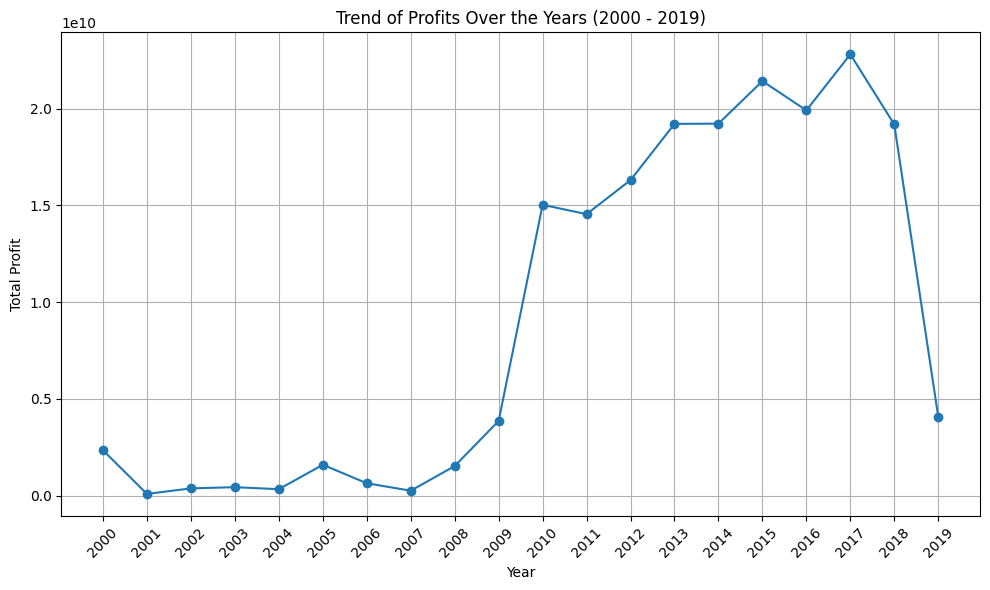

In [154]:
# plot a line plot of Trend of Profits Over the Years (2000 - 2019)
# Filter the dataset to include only the years from 2000 to 2019
filtered_df = df1[(df1['Release Year'] >= 2000) & (df1['Release Year'] <= 2019)]

# Group the data by year and calculate total profit for each year
yearly_profit = filtered_df.groupby('Release Year')['Profit'].sum()


# Plot a line plot to visualize the trend of profits over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_profit.index, yearly_profit.values, marker='o', linestyle='-')
plt.title('Trend of Profits Over the Years (2000 - 2019)')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(range(2000, 2020), rotation=45)
plt.tight_layout()
plt.show()

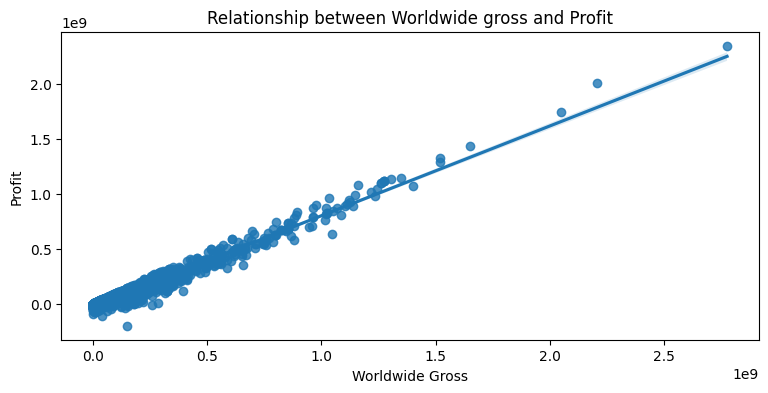

In [160]:
# Plot scatterplot showing the relationship between profit and worldwide gross
plt.figure(figsize = (9,4))
sns.regplot(x = 'worldwide_gross', y = 'Profit', data = df1)
plt.title('Relationship between Worldwide gross and Profit')
plt.xlabel('Worldwide Gross')
plt.ylabel('Profit')
plt.show()

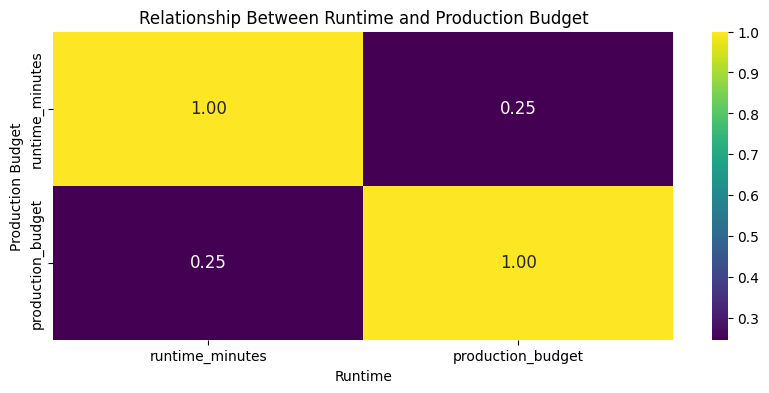

In [134]:
# plot a correlation heatmap between production budget and runtime minutes
plt.figure(figsize=(10, 4))
sns.heatmap(data=df1[['runtime_minutes', 'production_budget']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Production Budget')
plt.xlabel('Runtime')
plt.ylabel('Production Budget')
plt.show()

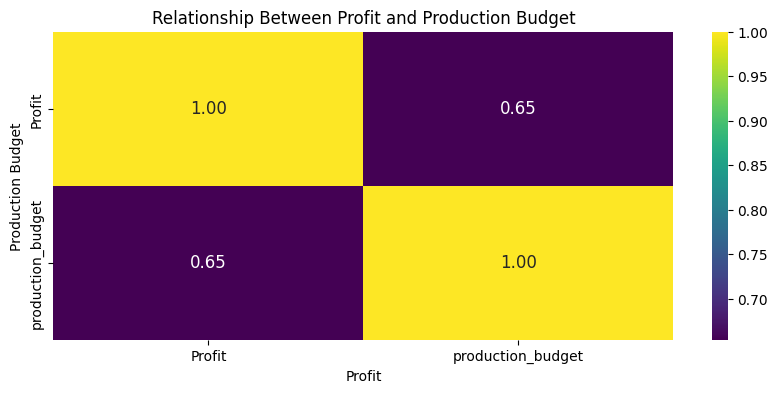

In [156]:
# plot a correlation heatmap between production budget and profit
plt.figure(figsize=(10, 4))
sns.heatmap(data=df1[['Profit', 'production_budget']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Profit and Production Budget')
plt.xlabel('Profit')
plt.ylabel('Production Budget')
plt.show()

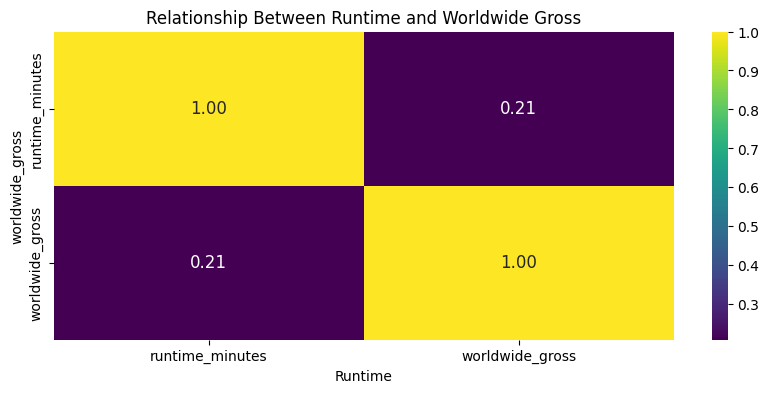

In [136]:
# plot a correlation heatmap between worlwide gross and runtime minutes
plt.figure(figsize=(10, 4))
sns.heatmap(data=df1[['runtime_minutes', 'worldwide_gross']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Worldwide Gross')
plt.xlabel('Runtime')
plt.ylabel('worldwide_gross')
plt.show()

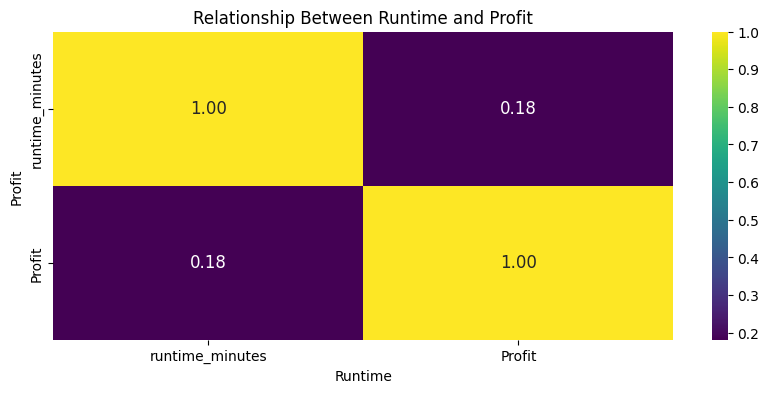

In [157]:
# plot a correlation heatmap between profit and runtime minutes
plt.figure(figsize=(10, 4))
sns.heatmap(data=df1[['runtime_minutes', 'Profit']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Profit')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.show()

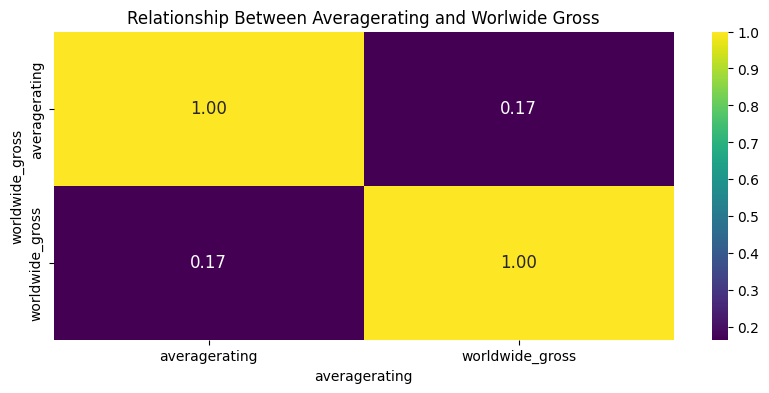

In [138]:
plt.figure(figsize=(10, 4))
sns.heatmap(data=df1[['averagerating', 'worldwide_gross']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Averagerating and Worlwide Gross')
plt.xlabel('averagerating')
plt.ylabel('worldwide_gross')
plt.show()

<ipython-input-162-0d7e3bdd3b4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df1.corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})


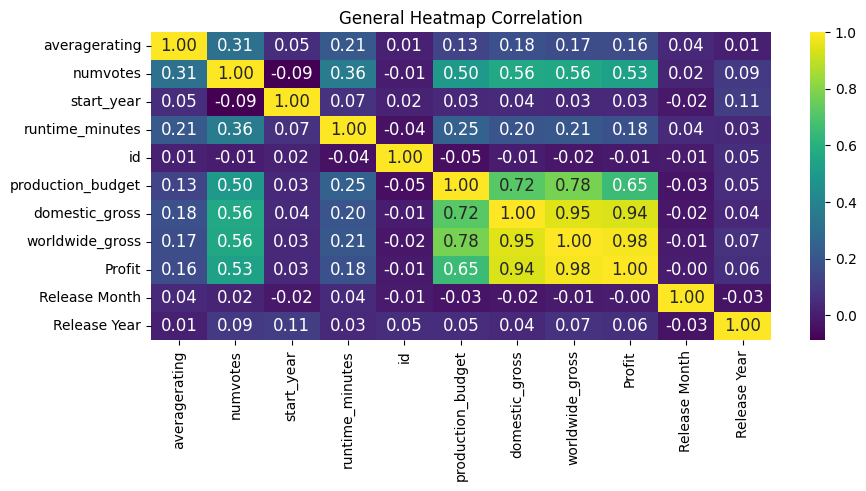

In [162]:
plt.figure(figsize=(10, 4))
sns.heatmap(data=df1.corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('General Heatmap Correlation')
plt.show()

**CONCLUSIONS**

1. Action, Adventure, Sci-Fi genre appears to be the most profitable genre.

2. There was a steady rise of profits in the movie industry until 2017 when the profits began to dip.

3. The highest selling month was June and more sales were made between November and December.

**RECOMMENDATIONS**
1. Microsoft should focus on producing movies with Action, Adventure, Sci-Fi genres to maximize on their profits.

2. Microsoft should target to produce more movies within their first production year to maximize their profits.

3. Microsoft should produce their movies towards the end of the year in November and December and mid year in June to maximize on sales.